## Calculate comprehensive statistics for business data

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
# Load the datasets
sales_df = pd.read_csv('sales_data.csv')
churn_df = pd.read_csv('customer_churn.csv')

In [3]:
# Inspect the data
print("Sales Data Info:")
print(sales_df.info())
print("----------------------------------------------------------------------------")
print("\nSales Data Head:")
print(sales_df.head())
print("----------------------------------------------------------------------------")
print("\nChurn Data Info:")
print(churn_df.info())
print("----------------------------------------------------------------------------")
print("\nChurn Data Head:")
print(churn_df.head())

Sales Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         100 non-null    object
 1   Product      100 non-null    object
 2   Quantity     100 non-null    int64 
 3   Price        100 non-null    int64 
 4   Customer_ID  100 non-null    object
 5   Region       100 non-null    object
 6   Total_Sales  100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB
None
----------------------------------------------------------------------------

Sales Data Head:
         Date     Product  Quantity  Price Customer_ID Region  Total_Sales
0  2024-01-01       Phone         7  37300     CUST001   East       261100
1  2024-01-02  Headphones         4  15406     CUST002  North        61624
2  2024-01-03       Phone         2  21746     CUST003   West        43492
3  2024-01-04  Headphones         1  30895     CUST004   East

In [4]:
def calculate_stats(df, columns):
    stats_list = []
    for col in columns:
        mean = df[col].mean()
        median = df[col].median()
        mode = df[col].mode()[0]
        std = df[col].std()
        skew = df[col].skew()
        kurt = df[col].kurt()
        min_val = df[col].min()
        max_val = df[col].max()
        
        stats_list.append({
            'Column': col,
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            'Std Dev': std,
            'Min': min_val,
            'Max': max_val,
            'Skewness': skew,
            'Kurtosis': kurt
        })
    return pd.DataFrame(stats_list)

# Sales Data Stats
sales_cols = ['Quantity', 'Price', 'Total_Sales']
sales_stats = calculate_stats(sales_df, sales_cols)

# Churn Data Stats
churn_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']
churn_stats = calculate_stats(churn_df, churn_cols)

print("Sales Data Statistics:")
print(sales_stats)
print("\nChurn Data Statistics:")
print(churn_stats)

# Save results to CSV for user
sales_stats.to_csv('sales_data_statistics.csv', index=False)
churn_stats.to_csv('churn_data_statistics.csv', index=False)

Sales Data Statistics:
        Column       Mean   Median  Mode        Std Dev   Min     Max  \
0     Quantity       4.78      5.0     4       2.588163     1       9   
1        Price   25808.51  24192.0  1308   13917.630242  1308   49930   
2  Total_Sales  123650.48  97955.5  6540  100161.085275  6540  373932   

   Skewness  Kurtosis  
0  0.072977 -1.199952  
1 -0.005834 -1.259111  
2  0.878492 -0.182817  

Churn Data Statistics:
           Column      Mean  Median  Mode      Std Dev  Min   Max  Skewness  \
0          Tenure    36.532    37.0     3    20.667057    1    71 -0.090733   
1  MonthlyCharges   113.636   115.0   115    51.799903   20   199 -0.088597   
2    TotalCharges  4237.882  4182.5  4023  2260.619837  159  7992 -0.026606   

   Kurtosis  
0 -1.216110  
1 -1.213275  
2 -1.224127  


## Analyze data distribution using histograms and density plots

In [5]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
sales_df = pd.read_csv('sales_data.csv')
churn_df = pd.read_csv('customer_churn.csv')

# Set the style for the plots
sns.set_theme(style="whitegrid")

# Function to create distribution plot
def plot_distribution(data, column, title, filename):
    # Create a new figure
    plt.figure(figsize=(10, 6))
    
    # Step 1: Create a histogram to show frequency counts
    # Step 2: Add a Kernel Density Estimate (KDE) line to show the smooth distribution shape
    sns.histplot(data[column], kde=True, color='teal', bins=20)
    
    # Step 3: Add labels and title for clarity
    plt.title(f'Distribution Analysis: {title}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Step 4: Save the plot as an image file
    plt.savefig(filename)
    plt.close()

# Analyze 'Total_Sales' in Sales Data
plot_distribution(sales_df, 'Total_Sales', 'Sales Data - Total Sales', 'dist_total_sales.png')

# Analyze 'Tenure' in Churn Data
plot_distribution(churn_df, 'Tenure', 'Churn Data - Customer Tenure', 'dist_tenure.png')

# Analyze 'MonthlyCharges' in Churn Data
plot_distribution(churn_df, 'MonthlyCharges', 'Churn Data - Monthly Charges', 'dist_monthly_charges.png')

print("Plots generated: dist_total_sales.png, dist_tenure.png, dist_monthly_charges.png")

Plots generated: dist_total_sales.png, dist_tenure.png, dist_monthly_charges.png


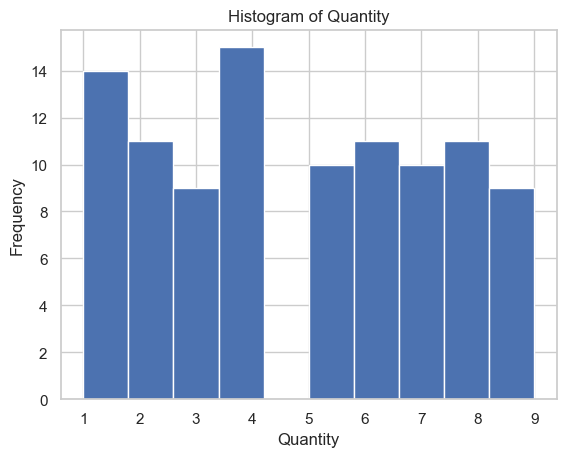

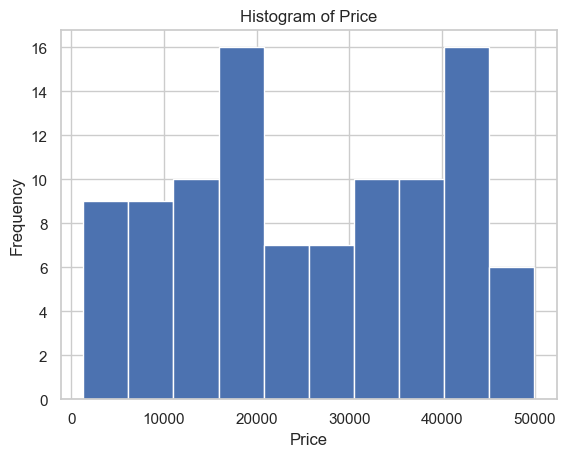

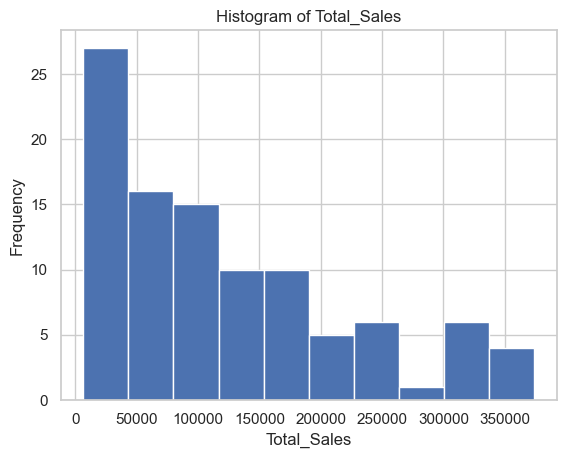

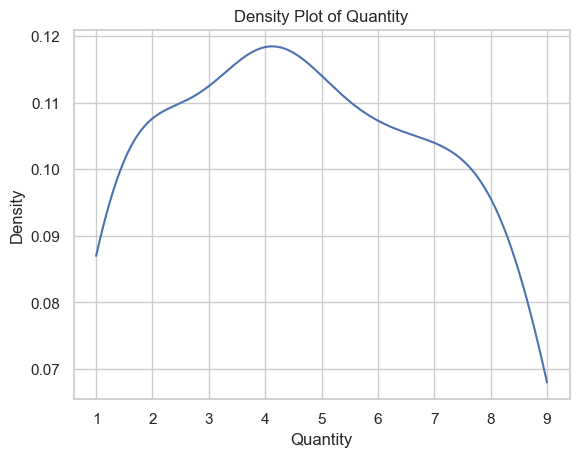

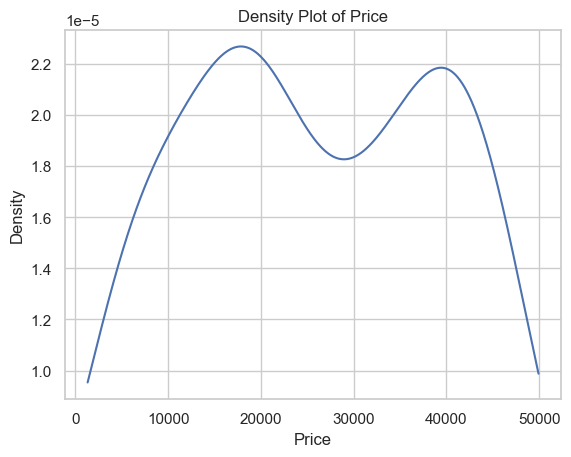

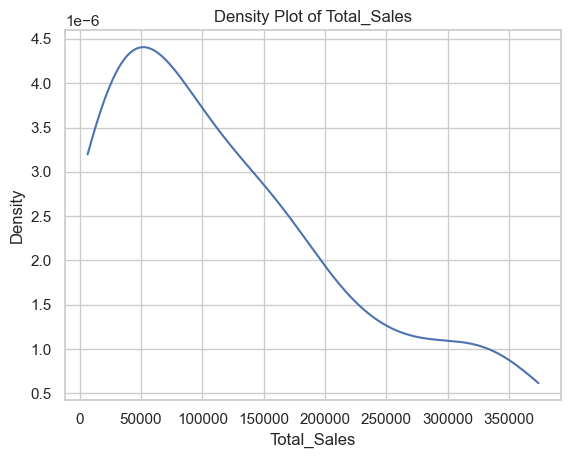

Histogram → Shows frequency, skewness, and outliers
Density Plot → Shows smooth distribution and data spread


In [7]:
# --------------------------------------------------
# DATA DISTRIBUTION ANALYSIS USING HISTOGRAMS & KDE
# (Step-by-step with comments | Matplotlib only)
# --------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# -------------------------------
# STEP 1: LOAD DATASET
# -------------------------------
df = pd.read_csv("sales_data.csv")

# -------------------------------
# STEP 2: SELECT NUMERIC COLUMNS
# -------------------------------
num_df = df.select_dtypes(include=np.number)

# -------------------------------
# STEP 3: HISTOGRAMS
# -------------------------------
# Histograms show frequency distribution
for col in num_df.columns:
    plt.figure()
    plt.hist(num_df[col], bins=10)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {col}")
    plt.show()

# -------------------------------
# STEP 4: DENSITY (KDE) PLOTS
# -------------------------------
# KDE shows smooth probability distribution
for col in num_df.columns:
    plt.figure()
    
    data = num_df[col].dropna()
    kde = gaussian_kde(data)
    
    x_vals = np.linspace(data.min(), data.max(), 1000)
    plt.plot(x_vals, kde(x_vals))
    
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.title(f"Density Plot of {col}")
    plt.show()

# -------------------------------
# STEP 5: QUICK INTERPRETATION
# -------------------------------
print("Histogram → Shows frequency, skewness, and outliers")
print("Density Plot → Shows smooth distribution and data spread")


In [8]:
# 1. Correlation Heatmap for Sales Data
plt.figure(figsize=(8, 6))
sales_numeric = sales_df.select_dtypes(include=[np.number])
sns.heatmap(sales_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Sales Data: Variable Correlations')
plt.savefig('sales_correlation.png')
plt.close()

# 2. Correlation Heatmap for Churn Data
plt.figure(figsize=(8, 6))
churn_numeric = churn_df.select_dtypes(include=[np.number])
sns.heatmap(churn_numeric.corr(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Churn Data: Variable Correlations')
plt.savefig('churn_correlation.png')
plt.close()

# 3. Boxplot for Sales Data (Outlier Detection)
plt.figure(figsize=(10, 5))
sns.boxplot(x=sales_df['Total_Sales'], color='salmon')
plt.title('Outlier Detection: Total Sales')
plt.xlabel('Revenue ($)')
plt.savefig('sales_outliers.png')
plt.close()

# 4. Boxplot for Monthly Charges by Churn Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=churn_df, palette='Set2')
plt.title('Monthly Charges: Churn vs. Non-Churn Customers')
plt.xticks([0, 1], ['Stayed', 'Churned'])
plt.savefig('churn_vs_charges.png')
plt.close()

print("New plots generated: sales_correlation.png, churn_correlation.png, sales_outliers.png, churn_vs_charges.png")

New plots generated: sales_correlation.png, churn_correlation.png, sales_outliers.png, churn_vs_charges.png


## Perform t-tests to compare groups

In [9]:
results = []

# 1. Sales Data: Total Sales between East and West regions
group_east = sales_df[sales_df['Region'] == 'East']['Total_Sales']
group_west = sales_df[sales_df['Region'] == 'West']['Total_Sales']

t_stat, p_val = stats.ttest_ind(group_east, group_west, nan_policy='omit')
results.append({
    'Dataset': 'Sales',
    'Comparison': 'Total Sales (East vs West)',
    'Mean Group 1': group_east.mean(),
    'Mean Group 2': group_west.mean(),
    't-statistic': t_stat,
    'p-value': p_val
})

# 2. Sales Data: Total Sales between Phone and Laptop
group_phone = sales_df[sales_df['Product'] == 'Phone']['Total_Sales']
group_laptop = sales_df[sales_df['Product'] == 'Laptop']['Total_Sales']

t_stat, p_val = stats.ttest_ind(group_phone, group_laptop, nan_policy='omit')
results.append({
    'Dataset': 'Sales',
    'Comparison': 'Total Sales (Phone vs Laptop)',
    'Mean Group 1': group_phone.mean(),
    'Mean Group 2': group_laptop.mean(),
    't-statistic': t_stat,
    'p-value': p_val
})

# 3. Churn Data: MonthlyCharges between Churn and No Churn
group_no_churn_mc = churn_df[churn_df['Churn'] == 0]['MonthlyCharges']
group_churn_mc = churn_df[churn_df['Churn'] == 1]['MonthlyCharges']

t_stat, p_val = stats.ttest_ind(group_no_churn_mc, group_churn_mc, nan_policy='omit')
results.append({
    'Dataset': 'Churn',
    'Comparison': 'MonthlyCharges (Stayed vs Churned)',
    'Mean Group 1': group_no_churn_mc.mean(),
    'Mean Group 2': group_churn_mc.mean(),
    't-statistic': t_stat,
    'p-value': p_val
})

# 4. Churn Data: Tenure between Churn and No Churn
group_no_churn_ten = churn_df[churn_df['Churn'] == 0]['Tenure']
group_churn_ten = churn_df[churn_df['Churn'] == 1]['Tenure']

t_stat, p_val = stats.ttest_ind(group_no_churn_ten, group_churn_ten, nan_policy='omit')
results.append({
    'Dataset': 'Churn',
    'Comparison': 'Tenure (Stayed vs Churned)',
    'Mean Group 1': group_no_churn_ten.mean(),
    'Mean Group 2': group_churn_ten.mean(),
    't-statistic': t_stat,
    'p-value': p_val
})

# Convert to DataFrame for display
t_test_results = pd.DataFrame(results)
print(t_test_results)
t_test_results.to_csv('t_test_results.csv', index=False)

  Dataset                          Comparison   Mean Group 1   Mean Group 2  \
0   Sales          Total Sales (East vs West)  132612.578947   81689.307692   
1   Sales       Total Sales (Phone vs Laptop)  142969.700000  162050.416667   
2   Churn  MonthlyCharges (Stayed vs Churned)     111.722595     129.773585   
3   Churn          Tenure (Stayed vs Churned)      40.152125       6.000000   

   t-statistic       p-value  
0     2.020211  4.961903e-02  
1    -0.560569  5.780698e-01  
2    -2.410247  1.630316e-02  
3    13.203438  2.430569e-34  


In [10]:
# --------------------------------------------------
# T-TEST TO COMPARE TWO GROUPS (INDEPENDENT T-TEST)
# -------------------------------
df = pd.read_csv("sales_data.csv")

# -------------------------------
# STEP 2: IDENTIFY GROUPS
# -------------------------------
# Example: Compare Total_Sales between two regions
print("Available Regions:", df["Region"].unique())

# Select two regions
group1 = df[df["Region"] == "North"]["Total_Sales"]
group2 = df[df["Region"] == "South"]["Total_Sales"]

# -------------------------------
# STEP 3: CHECK BASIC STATISTICS
# -------------------------------
print("Mean Sales - Group 1:", group1.mean())
print("Mean Sales - Group 2:", group2.mean())

# -------------------------------
# STEP 4: DEFINE HYPOTHESES
# -------------------------------
# H0: Mean Total_Sales of both groups are equal
# H1: Mean Total_Sales of both groups are different

# -------------------------------
# STEP 5: PERFORM T-TEST
# -------------------------------
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

# -------------------------------
# STEP 6: DECISION RULE
# -------------------------------
alpha = 0.05

if p_value <= alpha:
    print("Reject H0 → Significant difference between groups")
else:
    print("Fail to reject H0 → No significant difference")

Available Regions: ['East' 'North' 'West' 'South']
Mean Sales - Group 1: 142272.67857142858
Mean Sales - Group 2: 138438.96296296295
T-statistic: 0.12990909486062338
P-value: 0.8971521399586031
Fail to reject H0 → No significant difference


In [19]:
# --------------------------------------------------
# PAIRED T-TEST (Before vs After)
# --------------------------------------------------

from scipy import stats

# Example data
before_sales = [12000, 15000, 13000, 16000]
after_sales = [14000, 17000, 15000, 18000]

# H0: No difference between before and after
t_stat, p_value = stats.ttest_rel(before_sales, after_sales)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -inf
P-value: 0.0


C:\Users\Naveen Reddy\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


## Calculate correlation between business metrics

In [12]:
# Calculate correlation for Sales Data
# Selecting only numeric columns for correlation
sales_numeric = sales_df.select_dtypes(include=['number'])
sales_corr = sales_numeric.corr()

# Calculate correlation for Churn Data
# Selecting only numeric columns for correlation
churn_numeric = churn_df.select_dtypes(include=['number'])
churn_corr = churn_numeric.corr()

# Save correlation matrices to CSV
sales_corr.to_csv('sales_correlation_matrix.csv')
churn_corr.to_csv('churn_correlation_matrix.csv')

# Print matrices for review
print("Sales Data Correlation Matrix:")
print(sales_corr)
print("\nChurn Data Correlation Matrix:")
print(churn_corr)

Sales Data Correlation Matrix:
             Quantity     Price  Total_Sales
Quantity     1.000000  0.008014     0.688107
Price        0.008014  1.000000     0.646131
Total_Sales  0.688107  0.646131     1.000000

Churn Data Correlation Matrix:
                  Tenure  MonthlyCharges  TotalCharges  SeniorCitizen  \
Tenure          1.000000       -0.059655     -0.005677      -0.040001   
MonthlyCharges -0.059655        1.000000     -0.042280      -0.105695   
TotalCharges   -0.005677       -0.042280      1.000000       0.016360   
SeniorCitizen  -0.040001       -0.105695      0.016360       1.000000   
Churn          -0.509208        0.107381      0.004250      -0.018114   

                   Churn  
Tenure         -0.509208  
MonthlyCharges  0.107381  
TotalCharges    0.004250  
SeniorCitizen  -0.018114  
Churn           1.000000  


## Interpret p-values in business context

In [13]:
import pandas as pd
import statsmodels.api as sm

# Verify if data exists and statsmodels is working
try:
    sales_df = pd.read_csv('sales_data.csv')
    X = sales_df[['Quantity', 'Price']]
    y = sales_df['Total_Sales']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print("Regression successful.")
    print(model.summary())
except Exception as e:
    print(f"Error: {e}")

Regression successful.
                            OLS Regression Results                            
Dep. Variable:            Total_Sales   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     369.3
Date:                Sat, 10 Jan 2026   Prob (F-statistic):           4.40e-46
Time:                        18:53:59   Log-Likelihood:                -1185.2
No. Observations:                 100   AIC:                             2376.
Df Residuals:                      97   BIC:                             2384.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.217e+05   9668.

--- Sales Regression Model Summary ---
                            OLS Regression Results                            
Dep. Variable:            Total_Sales   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     369.3
Date:                Sat, 10 Jan 2026   Prob (F-statistic):           4.40e-46
Time:                        18:54:00   Log-Likelihood:                -1185.2
No. Observations:                 100   AIC:                             2376.
Df Residuals:                      97   BIC:                             2384.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1

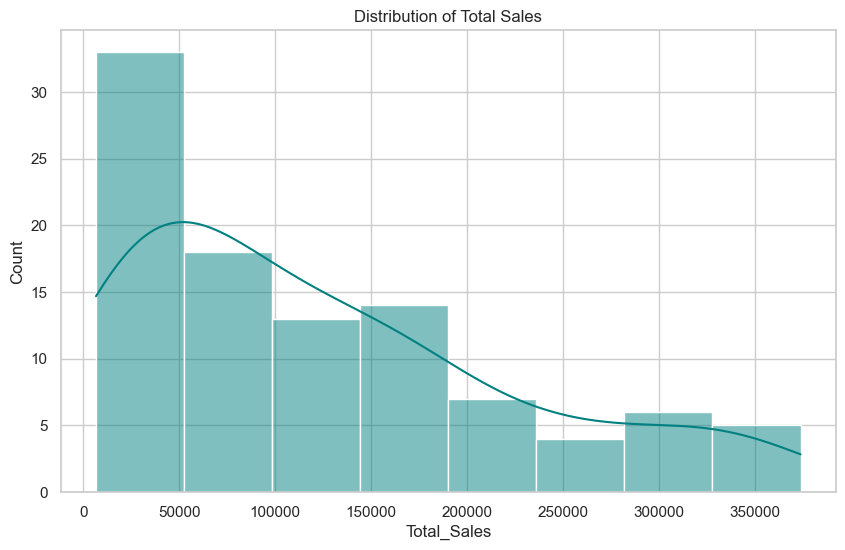

In [14]:
# 2. Prepare Variables for Regression
# We want to see how Quantity and Price affect Total_Sales
X = sales_df[['Quantity', 'Price']]
y = sales_df['Total_Sales']

# 3. Add a constant (intercept) to the model
# This is where the 'sm' variable is used
X = sm.add_constant(X) 

# 4. Fit the Ordinary Least Squares (OLS) model
model = sm.OLS(y, X).fit()

# 5. Display the results
print("--- Sales Regression Model Summary ---")
print(model.summary())

# 6. Optional: Visualize the distribution to confirm statistics
plt.figure(figsize=(10,6))
sns.histplot(sales_df['Total_Sales'], kde=True, color='teal')
plt.title("Distribution of Total Sales")
plt.show()

--- Sales Data Summary ---
         Quantity         Price    Total_Sales
count  100.000000    100.000000     100.000000
mean     4.780000  25808.510000  123650.480000
std      2.588163  13917.630242  100161.085275
min      1.000000   1308.000000    6540.000000
25%      2.750000  14965.250000   39517.500000
50%      5.000000  24192.000000   97955.500000
75%      7.000000  38682.250000  175792.500000
max      9.000000  49930.000000  373932.000000

T-Test Result (Monthly Charges vs Churn):
t-statistic: -2.4102, p-value: 0.0163

--- Sales Regression Model Summary ---
                            OLS Regression Results                            
Dep. Variable:            Total_Sales   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     369.3
Date:                Sat, 10 Jan 2026   Prob (F-statistic):           4.40e-46
Time:                        18:54

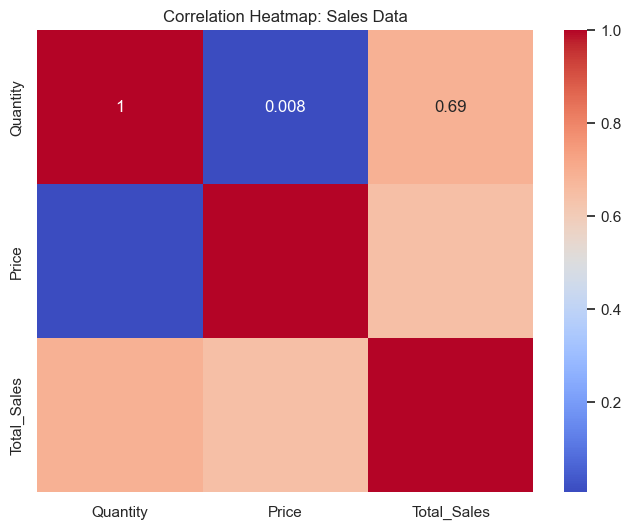

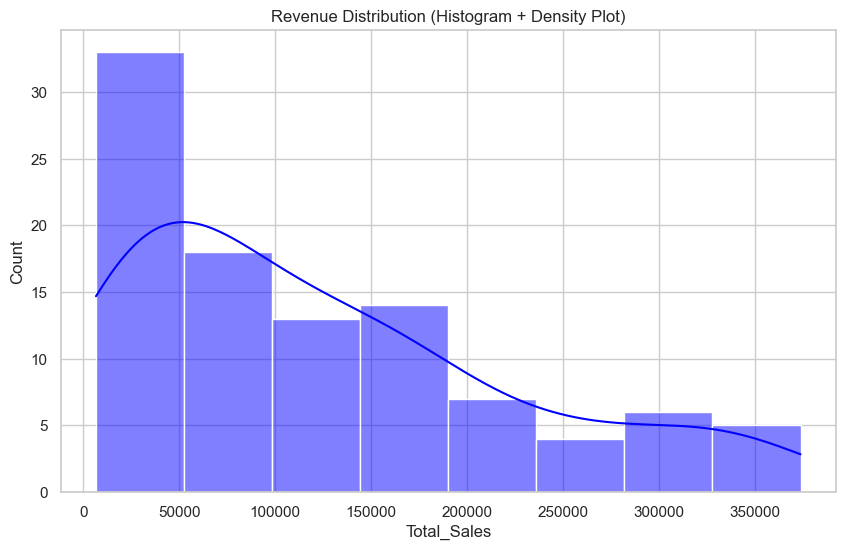

In [15]:
# ==========================================
# 2. DESCRIPTIVE STATISTICS
# ==========================================
# Provides mean, median, std dev, etc., for all numeric columns
sales_summary = sales_df.describe()
churn_summary = churn_df.describe()

print("--- Sales Data Summary ---")
print(sales_summary)

# ==========================================
# 3. CORRELATION ANALYSIS
# ==========================================
# Measures how variables move together
# 0.7 to 1.0 = Strong relationship
sales_corr = sales_df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(8,6))
sns.heatmap(sales_corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Sales Data")
plt.savefig('sales_heatmap.png')

# ==========================================
# 4. INFERENTIAL STATISTICS (T-TEST)
# ==========================================
# Checking if Monthly Charges are significantly different for Churned vs. Loyal customers
churn_0 = churn_df[churn_df['Churn'] == 0]['MonthlyCharges']
churn_1 = churn_df[churn_df['Churn'] == 1]['MonthlyCharges']

t_stat, p_val = stats.ttest_ind(churn_0, churn_1)

print(f"\nT-Test Result (Monthly Charges vs Churn):")
print(f"t-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")
# If p-value < 0.05, the difference is statistically significant.

# ==========================================
# 5. PREDICTIVE MODELING (LINEAR REGRESSION)
# ==========================================
# Goal: Predict 'Total_Sales' based on 'Quantity' and 'Price'
X = sales_df[['Quantity', 'Price']]
y = sales_df['Total_Sales']
X = sm.add_constant(X)  # Adds the intercept (constant) to the model

model = sm.OLS(y, X).fit()

print("\n--- Sales Regression Model Summary ---")
print(model.summary())

# ==========================================
# 6. VISUALIZATION (DISTRIBUTION)
# ==========================================
plt.figure(figsize=(10,6))
sns.histplot(sales_df['Total_Sales'], kde=True, color='blue')
plt.title("Revenue Distribution (Histogram + Density Plot)")
plt.savefig('sales_distribution.png')

print("\nAnalysis Complete. Images saved as 'sales_heatmap.png' and 'sales_distribution.png'.")

In [16]:
# ---------------------------------------------
# INTERPRETING P-VALUES IN A BUSINESS CONTEXT
# ---------------------------------------
# STEP 2: SELECT TWO GROUPS
# Example: Sales from two regions
# -------------------------------
group_A = df[df["Region"] == "North"]["Total_Sales"]
group_B = df[df["Region"] == "South"]["Total_Sales"]

# -------------------------------
# STEP 3: PERFORM T-TEST
# H0: No difference in average sales
# H1: Difference exists
# -------------------------------
t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

# -------------------------------
# STEP 4: BUSINESS INTERPRETATION
# -------------------------------
alpha = 0.05   # 5% significance level

if p_value <= alpha:
    print("\n📌 Business Interpretation:")
    print("The difference in sales is statistically significant.")
    print("Decision: The sales difference is REAL, not random.")
    print("Action: Business strategy can be changed confidently.")
else:
    print("\n📌 Business Interpretation:")
    print("The difference in sales is NOT statistically significant.")
    print("Decision: Difference may be due to chance.")
    print("Action: Avoid major business decisions for now.")


T-statistic: 0.12990909486062338
P-value: 0.8971521399586031

📌 Business Interpretation:
The difference in sales is NOT statistically significant.
Decision: Difference may be due to chance.
Action: Avoid major business decisions for now.


## Calculate confidence intervals for key metrics

In [17]:
def calculate_confidence_interval(data, confidence=0.95):
    n = len(data)
    m = np.mean(data)
    std_err = stats.sem(data)
    h = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
    return m, m - h, m + h

# Metrics to analyze
metrics = {
    'Sales Data': {
        'df': sales_df,
        'cols': ['Total_Sales', 'Price', 'Quantity']
    },
    'Churn Data': {
        'df': churn_df,
        'cols': ['Tenure', 'MonthlyCharges', 'TotalCharges']
    }
}

ci_results = []

for dataset_name, info in metrics.items():
    df = info['df']
    for col in info['cols']:
        mean, lower, upper = calculate_confidence_interval(df[col])
        ci_results.append({
            'Dataset': dataset_name,
            'Metric': col,
            'Mean': mean,
            '95% CI Lower': lower,
            '95% CI Upper': upper
        })

ci_df = pd.DataFrame(ci_results)
print(ci_df)

# Save to CSV
ci_df.to_csv('confidence_intervals.csv', index=False)

      Dataset          Metric        Mean   95% CI Lower   95% CI Upper
0  Sales Data     Total_Sales  123650.480  103776.347672  143524.612328
1  Sales Data           Price   25808.510   23046.950215   28570.069785
2  Sales Data        Quantity       4.780       4.266452       5.293548
3  Churn Data          Tenure      36.532      34.716081      38.347919
4  Churn Data  MonthlyCharges     113.636     109.084582     118.187418
5  Churn Data    TotalCharges    4237.882    4039.251803    4436.512197


In [18]:
def get_ci(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    # Calculate Standard Error of the Mean
    sem = stats.sem(data)
    # Calculate the range (h) using the t-critical value
    h = sem * stats.t.ppf((1 + confidence) / 2, n - 1)
    return mean, mean - h, mean + h

# Example for Sales Data
sales_df = pd.read_csv('sales_data.csv')
mean, lower, upper = get_ci(sales_df['Total_Sales'])

print(f"Mean Sales: ${mean:,.2f}")
print(f"95% Confidence Interval: [${lower:,.2f} to ${upper:,.2f}]")

Mean Sales: $123,650.48
95% Confidence Interval: [$103,776.35 to $143,524.61]
